### import libraries

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [3]:
df_countries = pd.read_csv("data/processed/preprocessed_data.csv")
df_countries.head()

,Unnamed: 0,location,continent,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,population,stringency_index
0,0,Afghanistan,Asia,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772,0.0
1,1,Afghanistan,Asia,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772,0.0
2,2,Afghanistan,Asia,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772,0.0
3,3,Afghanistan,Asia,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772,0.0
4,4,Afghanistan,Asia,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772,0.0


### Global Summary Stats

In [4]:
median_date = df_countries['date'].max()
median_date

'2024-08-14'

In [9]:
# Get the latest data
# latest_date = df_countries['date'].max()
latest_date = '2022-08-14'
print("Latest data date:", latest_date)

# Filter data for the latest date
latest_df = df_countries[df_countries['date'] == latest_date]

# sort by total cases
top_cases = latest_df.sort_values(by='total_cases', ascending=False)
top_cases.head()

Latest data date: 2022-08-14


,Unnamed: 0,location,continent,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,population,stringency_index
382575,404403,United States,North America,2022-08-14,91722552.0,701618.0,1028296.0,3442.0,6.107330e+08,2.623299e+08,224855433.0,338289856,32.56
164423,174501,India,Asia,2022-08-14,44253464.0,107732.0,527037.0,348.0,2.080314e+09,1.023010e+09,937694109.0,1417173120,31.48
47828,51186,Brazil,South America,2022-08-14,34148131.0,153661.0,681253.0,1495.0,4.670030e+08,1.859935e+08,171111631.0,215313504,23.93
124267,131319,France,Europe,2022-08-14,33130794.0,151186.0,153643.0,518.0,1.491255e+08,5.457581e+07,53058533.0,67813000,11.11
134311,141363,Germany,Europe,2022-08-14,31589031.0,298292.0,150237.0,623.0,1.844331e+08,6.477976e+07,63451230.0,83369840,11.11


C:\Users\thili\AppData\Local\Temp\ipykernel_14420\981838281.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cases, x='total_cases', y='location', palette='Reds_r')


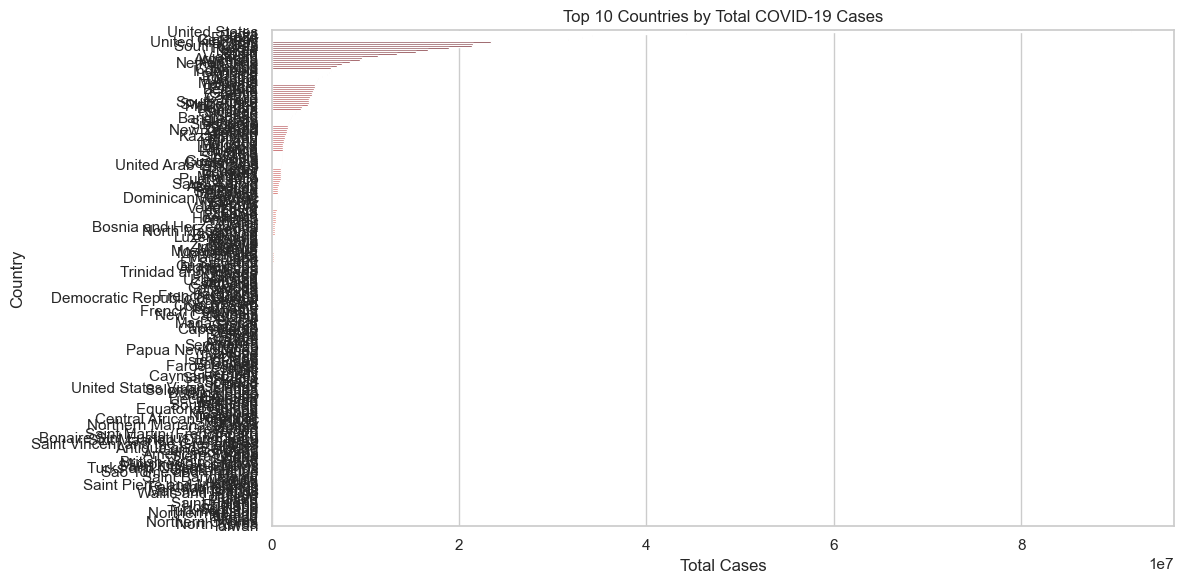

In [10]:
# Plot
sns.barplot(data=top_cases, x='total_cases', y='location', palette='Reds_r')
plt.title("Top 10 Countries by Total COVID-19 Cases")
plt.xlabel("Total Cases")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

### Trend Over Time for a Country

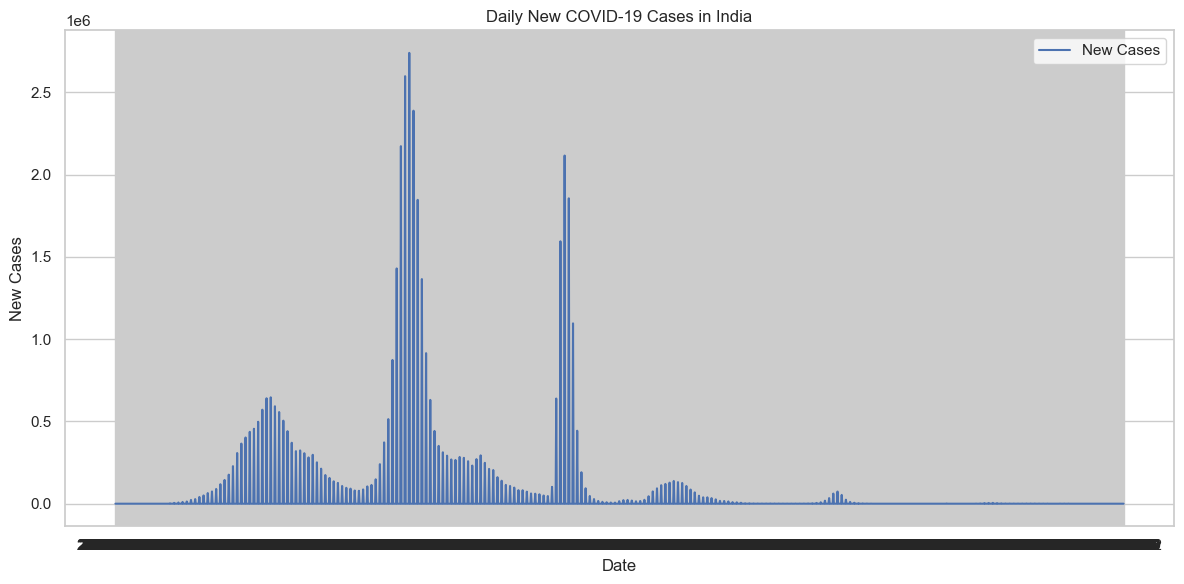

In [ ]:
# Choose a country (you can change this)
country = "India"
country_df = df_countries[df_countries['location'] == country]

# Plot
plt.plot(country_df['date'], country_df['new_cases'], label='New Cases')
plt.title(f"Daily New COVID-19 Cases in {country}")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.tight_layout()
plt.show()


### Compare Multiple Countries

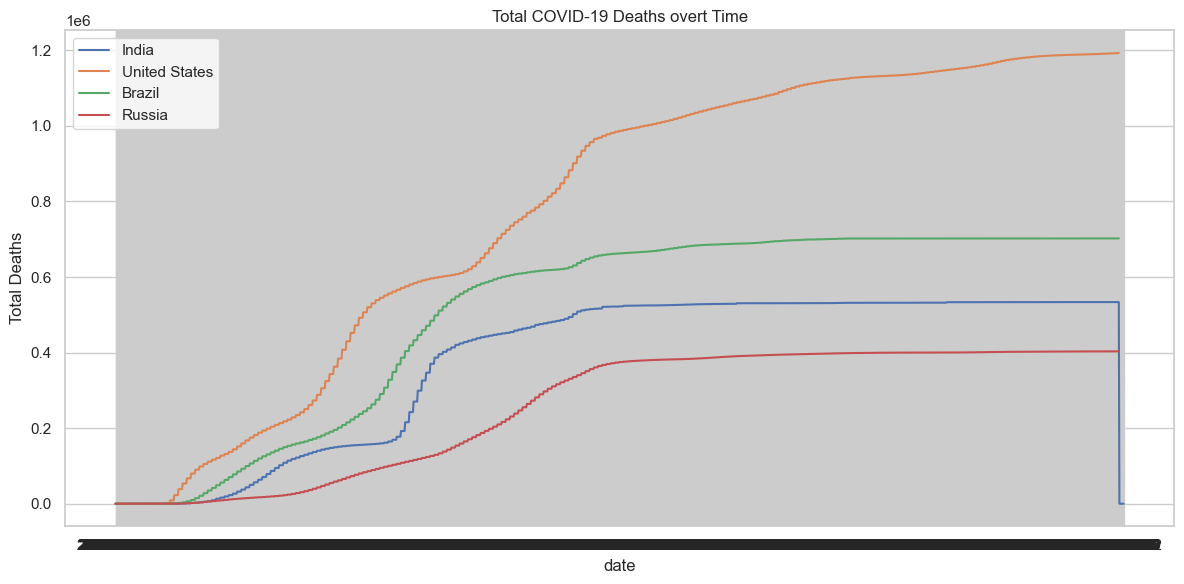

In [11]:
countries = ['India', 'United States', 'Brazil', 'Russia']
for country in countries:
    c_df = df_countries[df_countries['location'] == country]
    plt.plot(c_df['date'], c_df['total_deaths'], label=country)

plt.title("Total COVID-19 Deaths overt Time")
plt.xlabel("date")
plt.ylabel("Total Deaths")
plt.legend()
plt.tight_layout()
plt.show()

### Correlation Analysis

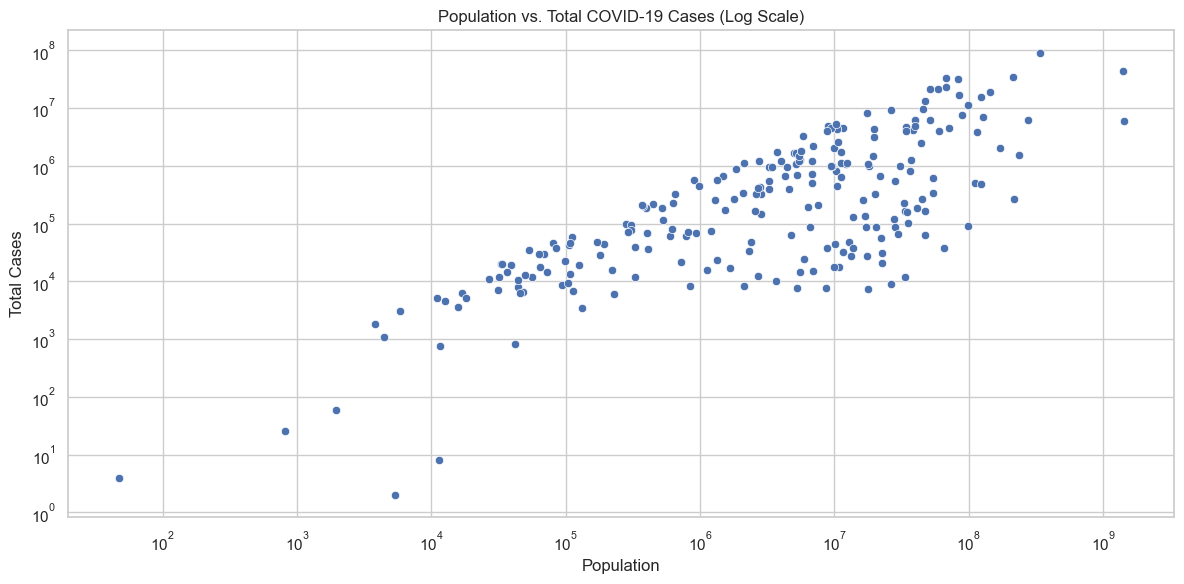

In [12]:
sns.scatterplot(data=latest_df, x='population', y='total_cases')
plt.xscale('log')
plt.yscale('log')
plt.title("Population vs. Total COVID-19 Cases (Log Scale)")
plt.xlabel("Population")
plt.ylabel("Total Cases")
plt.tight_layout()
plt.show()

### Top 10 Countries by Vaccination Rate(% Fully Vaccinated)

C:\Users\thili\AppData\Local\Temp\ipykernel_14420\3029996858.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_df['fully_vaccinated_pct'] = (
C:\Users\thili\AppData\Local\Temp\ipykernel_14420\3029996858.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_vaccinated, x='fully_vaccinated_pct', y='location', palette='Greens_r')


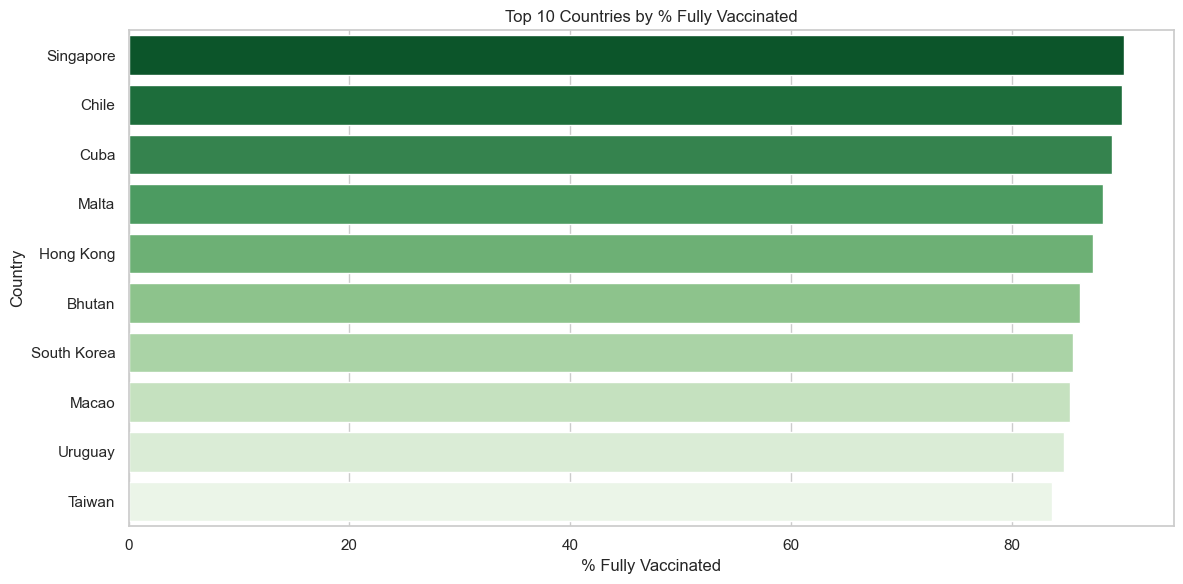

In [13]:
# Add a column for vaccination percentage
latest_df['fully_vaccinated_pct'] = (
    latest_df['people_fully_vaccinated'] / latest_df['population'] * 100
)

# Top 10 countries by fully vaccinated percentage
top_vaccinated = latest_df.sort_values(by='fully_vaccinated_pct', ascending=False).head(10)

sns.barplot(data=top_vaccinated, x='fully_vaccinated_pct', y='location', palette='Greens_r')
plt.title("Top 10 Countries by % Fully Vaccinated")
plt.xlabel("% Fully Vaccinated")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

### Deaths Per Million

C:\Users\thili\AppData\Local\Temp\ipykernel_14420\1952537123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_df['deaths_per_million'] = (
C:\Users\thili\AppData\Local\Temp\ipykernel_14420\1952537123.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_deaths, x='deaths_per_million', y='location', palette='Reds')


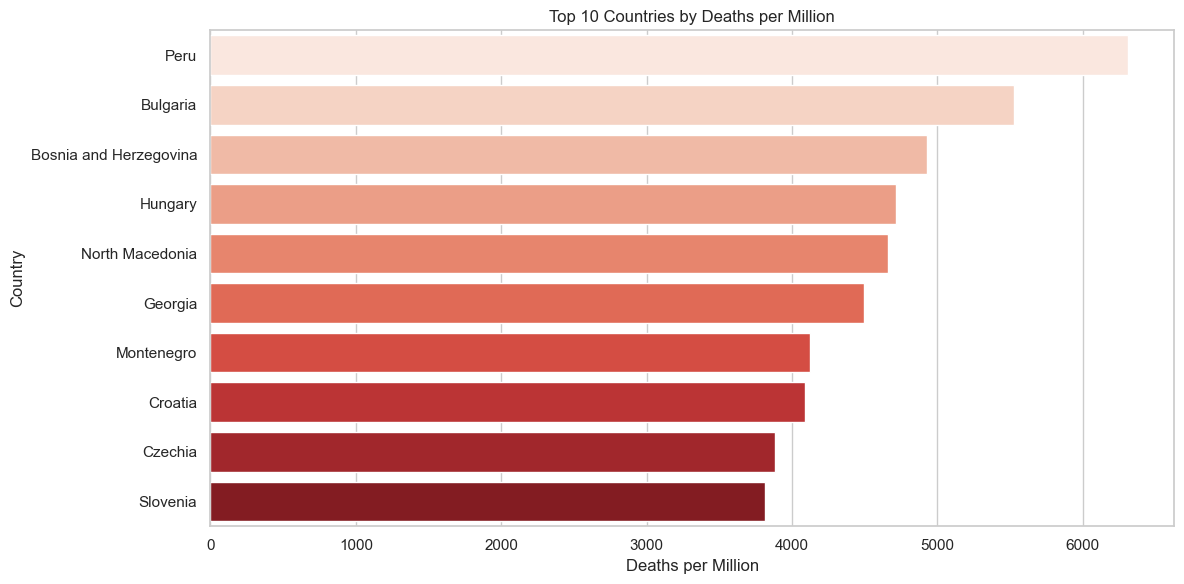

In [14]:
# Calculate deaths per million
latest_df['deaths_per_million'] = (
    latest_df['total_deaths'] / latest_df['population'] * 1e6
)

# Top 10 by deaths per million
top_deaths = latest_df.sort_values(by='deaths_per_million', ascending=False).head(10)

sns.barplot(data=top_deaths, x='deaths_per_million', y='location', palette='Reds')
plt.title("Top 10 Countries by Deaths per Million")
plt.xlabel("Deaths per Million")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


### Cases Per Million

C:\Users\thili\AppData\Local\Temp\ipykernel_14420\2095265672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_df['cases_per_million'] = (
C:\Users\thili\AppData\Local\Temp\ipykernel_14420\2095265672.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cases_per_million, x='cases_per_million', y='location', palette='Blues')


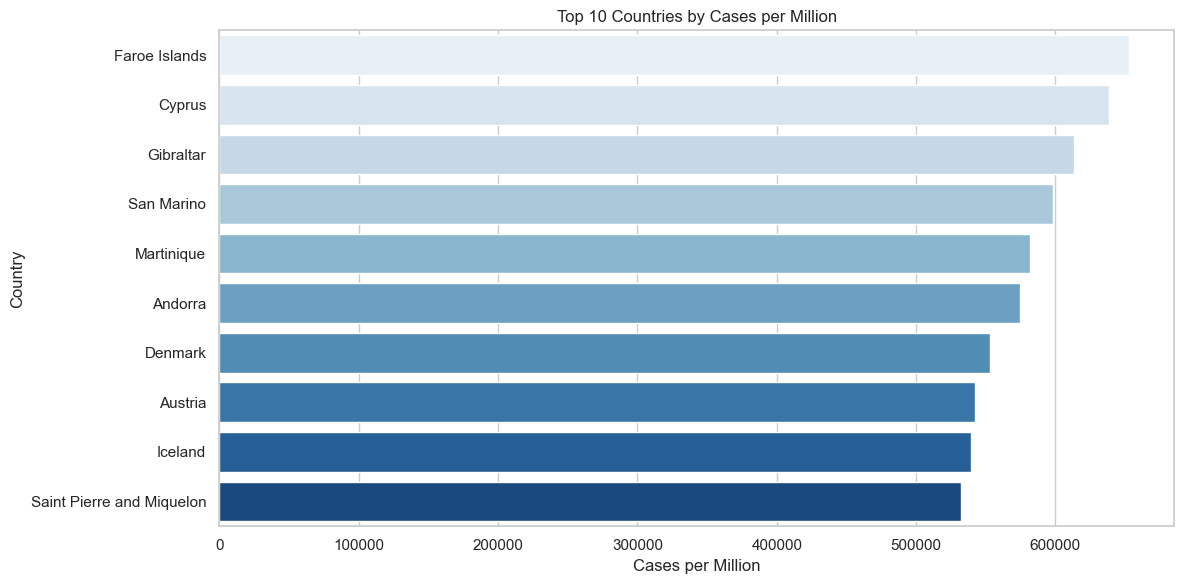

In [15]:
# Calculate cases per million
latest_df['cases_per_million'] = (
    latest_df['total_cases'] / latest_df['population'] * 1e6
)

top_cases_per_million = latest_df.sort_values(by='cases_per_million', ascending=False).head(10)

sns.barplot(data=top_cases_per_million, x='cases_per_million', y='location', palette='Blues')
plt.title("Top 10 Countries by Cases per Million")
plt.xlabel("Cases per Million")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


### Government Stringency Index (Policy Strictness)

C:\Users\thili\AppData\Local\Temp\ipykernel_14420\3050269839.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_stringency, x='stringency_index', y='location', palette='Purples')


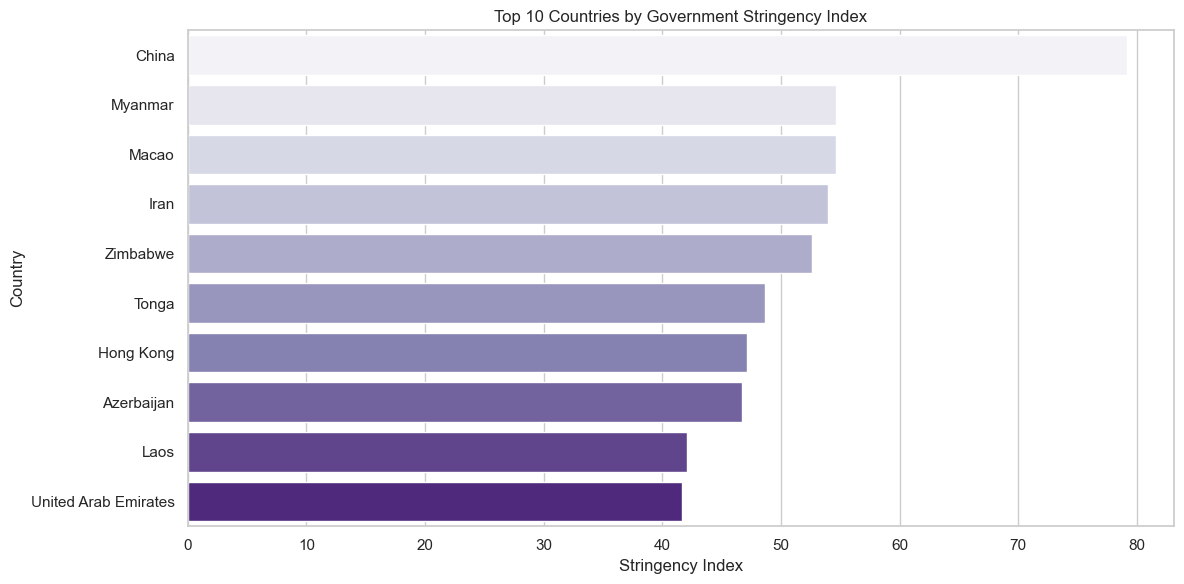

In [16]:
top_stringency = latest_df.sort_values(by='stringency_index', ascending=False).head(10)

sns.barplot(data=top_stringency, x='stringency_index', y='location', palette='Purples')
plt.title("Top 10 Countries by Government Stringency Index")
plt.xlabel("Stringency Index")
plt.ylabel("Country")
plt.tight_layout()
plt.show()
